In [24]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon

In [4]:
carreaux = gpd.read_parquet('carreaux-200m-met-3035.parquet') 

In [7]:
carreaux['x'] = carreaux.geometry.centroid.x - 100
carreaux['y'] = carreaux.geometry.centroid.y - 100

In [81]:
size = 20000
carreaux['x_'+str(size)] = np.floor(carreaux.x / size) * size
carreaux['y_'+str(size)] = np.floor(carreaux.y / size) * size

temp = carreaux.groupby(['x_'+str(size), 'y_'+str(size)], as_index=False)['ind'].sum()
temp['density'] = temp.ind / (size/1000)**2

geometry = [ Polygon ([( x , y ) ,
                       ( x + size , y ) ,
                       ( x + size , y + size ) ,
                       (x , y + size ) ])
             for x , y in zip (temp['x_'+str(size)] , temp['y_'+str(size)]) ]
stemp = gpd.GeoDataFrame(temp, geometry = geometry , crs='EPSG:3035')

stemp.to_file('carreaux_'+str(size)+'.geojson', driver='GeoJSON')


#### zoom sur Paris

In [82]:
paris_x = 3760524.400341 
paris_y = 2889128.935875

In [83]:
size = 5000


carreaux['x_'+str(size)] = np.floor(carreaux.x / size) * size
carreaux['y_'+str(size)] = np.floor(carreaux.y / size) * size

temp  = carreaux[(np.abs(carreaux.x - paris_x)<100000)&(np.abs(carreaux.y - paris_y)<100000)]

temp = temp.groupby(['x_'+str(size), 'y_'+str(size)], as_index=False)['ind'].sum()
temp['density'] = temp.ind / (size/1000)**2

geometry = [ Polygon ([( x , y ) ,
                       ( x + size , y ) ,
                       ( x + size , y + size ) ,
                       (x , y + size ) ])
             for x , y in zip (temp['x_'+str(size)] , temp['y_'+str(size)]) ]
stemp = gpd.GeoDataFrame(temp, geometry = geometry , crs='EPSG:3035')

stemp.to_file('carreaux_'+str(size)+'.geojson', driver='GeoJSON')

In [84]:
size = 1000



carreaux['x_'+str(size)] = np.floor(carreaux.x / size) * size
carreaux['y_'+str(size)] = np.floor(carreaux.y / size) * size

temp  = carreaux[(np.abs(carreaux.x - paris_x)<20000)&(np.abs(carreaux.y - paris_y)<20000)]

temp = temp.groupby(['x_'+str(size), 'y_'+str(size)], as_index=False)['ind'].sum()
temp['density'] = temp.ind / (size/1000)**2

geometry = [ Polygon ([( x , y ) ,
                       ( x + size , y ) ,
                       ( x + size , y + size ) ,
                       (x , y + size ) ])
             for x , y in zip (temp['x_'+str(size)] , temp['y_'+str(size)]) ]
stemp = gpd.GeoDataFrame(temp, geometry = geometry , crs='EPSG:3035')

stemp.to_file('carreaux_'+str(size)+'.geojson', driver='GeoJSON')

In [85]:
size = 200



carreaux['x_'+str(size)] = np.floor(carreaux.x / size) * size
carreaux['y_'+str(size)] = np.floor(carreaux.y / size) * size

temp  = carreaux[(np.abs(carreaux.x - paris_x)<4000)&(np.abs(carreaux.y - paris_y)<4000)]

temp = temp.groupby(['x_'+str(size), 'y_'+str(size)], as_index=False)['ind'].sum()
temp['density'] = temp.ind / (size/1000)**2

geometry = [ Polygon ([( x , y ) ,
                       ( x + size , y ) ,
                       ( x + size , y + size ) ,
                       (x , y + size ) ])
             for x , y in zip (temp['x_'+str(size)] , temp['y_'+str(size)]) ]
stemp = gpd.GeoDataFrame(temp, geometry = geometry , crs='EPSG:3035')
stemp.to_file('carreaux_'+str(size)+'.geojson', driver='GeoJSON')

<AxesSubplot:>

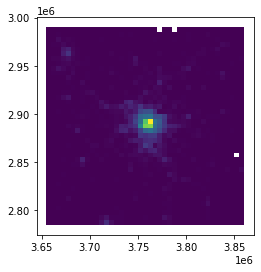

In [75]:
stemp.plot('ind')